# Projet Machine Learning: Clustering 

### Imports des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignorer les méssages d'avertissements
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

### Lecture et exploration de la source de données

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head() # Affichage des 5 premiers enregistrements

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [4]:
# Ajout des noms des colonnes
col = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
# Lecture des données et ajout des noms des colonnes
iris =pd.read_csv('iris.csv', names=col)

In [5]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Import de la  librairie de la méthode K-means utilisée pour la ségmentation

In [6]:
from sklearn.cluster import KMeans

### Estimation du nombre de classe par la méthode de coude

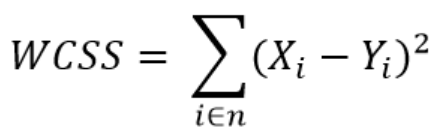

In [7]:
from IPython.display import Image
Image("wcss.png")

WCSS est la somme de la distance au carré entre chaque point et le centroïde dans un cluster. Lorsque nous traçons le WCSS avec la valeur K, le tracé ressemble à un coude. Au fur et à mesure que le nombre de clusters augmente, la valeur WCSS commence à diminuer. La valeur WCSS est la plus élevée lorsque K = 1.

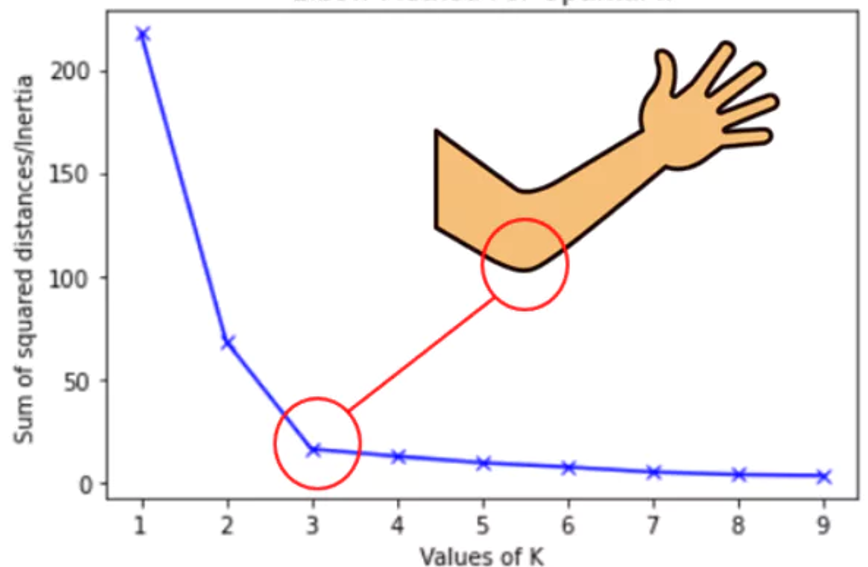

In [8]:
Image("GrapheCoude.png", width = 500, height = 300)

In [9]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[680.8244000000001,
 152.36870647733906,
 78.94506582597731,
 71.33622242453569,
 46.56163015873016,
 38.930963049671746,
 34.49579152470548,
 30.365405873514565,
 28.350284848484844,
 26.444028138528143]

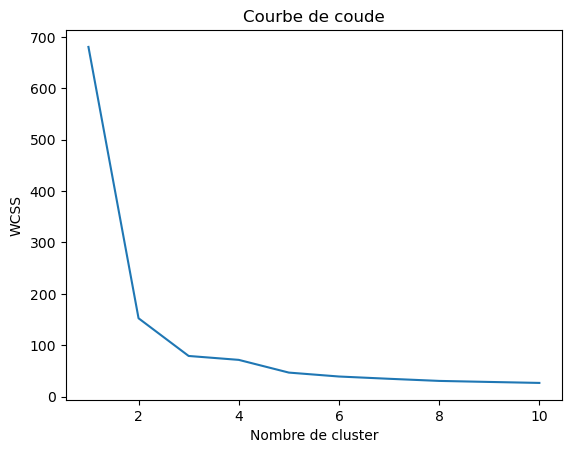

In [11]:
plt.plot(range(1,11),wcss)
plt.title('Courbe de coude')
plt.xlabel('Nombre de cluster')
plt.ylabel('WCSS')
plt.show()

### Création de 3 classes d'Iris

In [12]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(iris);

### Affichages des centres de chaque classes

In [13]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

### Comptage des individus de chaque classe

In [14]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print (unique, counts)

[0 1 2] [39 50 61]


### Affichage l'affectation de chaque individue à sa classe numéroté 0, 1 et 2

In [15]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [16]:
iris['Cluster'] = kmeans.labels_ # Ajout d'une colonne cluster à la base de données

In [17]:
iris.head() # Affichage des 5 premiers enregistrements et leur classe respective

,SepalLength,SepalWidth,PetalLength,PetalWidth,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Representation dans un nuage de points les Iris par classe respective

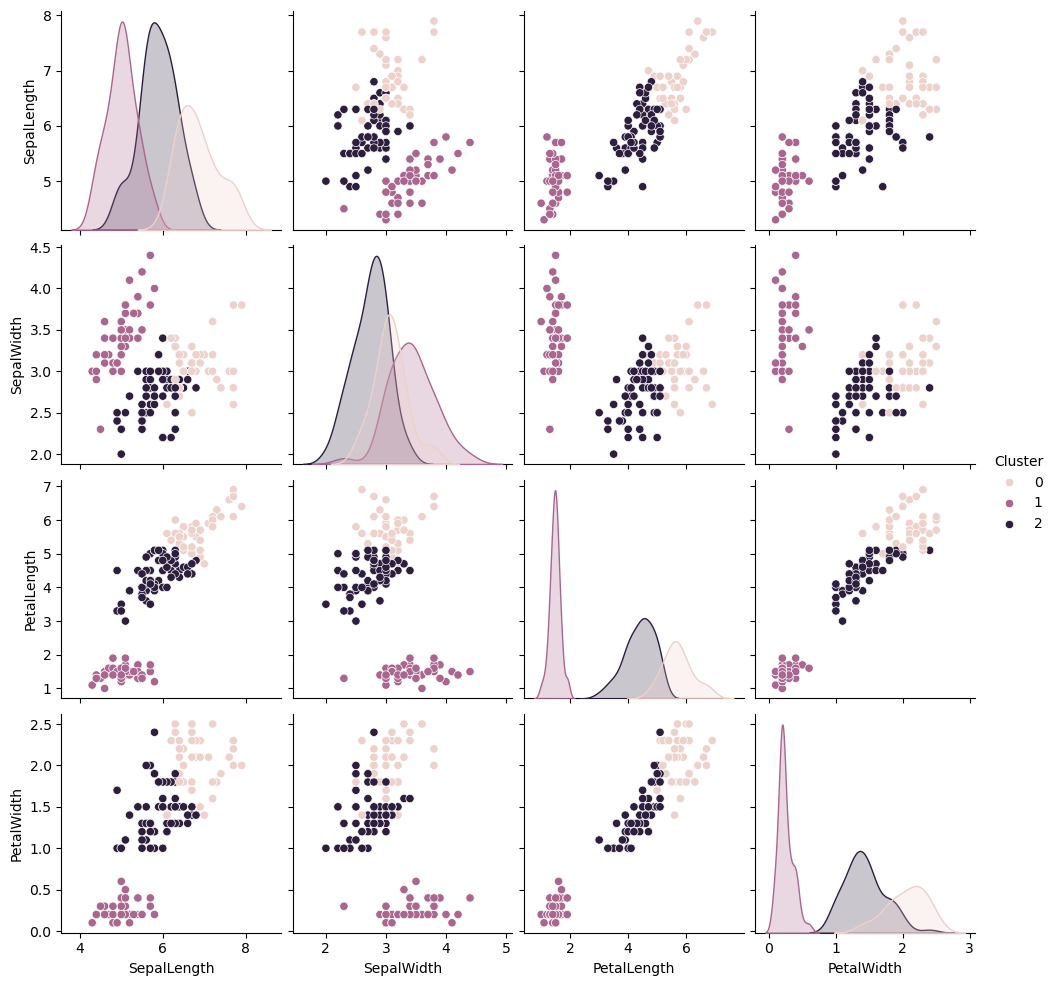

In [18]:
sns.pairplot(iris.drop(iris.Cluster), hue="Cluster", diag_kind = 'kde')
plt.show()